In [133]:
from simulator import Simulator
import time 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches


import warnings
warnings.filterwarnings("ignore", message="divide by zero encountered in divide")
warnings.filterwarnings("ignore", message="overflow encountered in divide")


In [81]:
# Run Simulation

def run_simulation(iterations,starting_state):
    simulation_paths = []
    start = time.time()

    for iter in range(iterations):
        if iter % 10000 == 0 and iter > 0:
            print(f"Ran {iter} iterations",'-',f"{time.time()-start:.3f}s")
        simulation_paths.append(sim.simulate_game(starting_state))

    print(f"Ran in {time.time()-start:.3f}s.")

    return simulation_paths

In [91]:
# Build Dataset 

def build_dataset(simulation_paths,player_num,epsilon,tokens):
    data_list = []
    data_cols = ['player','epsilon','tokens','game_id','throw_number','state','state_score','state_tokens']

    for game in range(len(simulation_paths)):

        for throw in range(len(simulation_paths[game])):

            data_list.append([player_num,epsilon,tokens,game,throw,simulation_paths[game][throw],simulation_paths[game][throw][0],simulation_paths[game][throw][1]])

    df = pd.DataFrame(data_list,columns=data_cols)

    return df 

In [92]:
#Sanity Check - expected # throws for e=1 and t=0 should be ~15.85 

iterations = 10000
player_num = 10
epsilon = 1
tokens = 0
starting_state = (501,tokens)

simulation_paths = run_simulation(iterations,starting_state)
df = build_dataset(simulation_paths,player_num,epsilon,tokens)


df.groupby('game_id').count().player.mean() - 1

Ran in 4.316s.


15.8565

In [144]:
#Sanity Check - expected # throws for e=1 and t=0 should be ~15.85 

iterations = 10000
player_num = 10
epsilon = 7
tokens = 0
starting_state = (501,tokens)

simulation_paths = run_simulation(iterations,starting_state)
df = build_dataset(simulation_paths,player_num,epsilon,tokens)


df.groupby('game_id').count().player.mean() - 1

Ran in 11.224s.


38.8522

In [137]:
# Initialize Parameters 

iterations = 100
player_num = 10
tokens = 0
epsilon_list = [1,2,3,4,5,6,7,8]
starting_state = (501,tokens)

col_names = ['player','epsilon','tokens','game_id','throw_number','state','state_score','state_tokens']
df = pd.DataFrame(columns=col_names)

for epsilon in epsilon_list:
    
    sim = Simulator(player_num=player_num,epsilon=epsilon)
    simulation_paths = run_simulation(iterations,starting_state)
    df = pd.concat([df,build_dataset(simulation_paths,player_num,epsilon,tokens)])
    df = df.reset_index().drop(['index'],axis=1)
    


load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.048s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.065s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e3_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.076s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e4_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.09

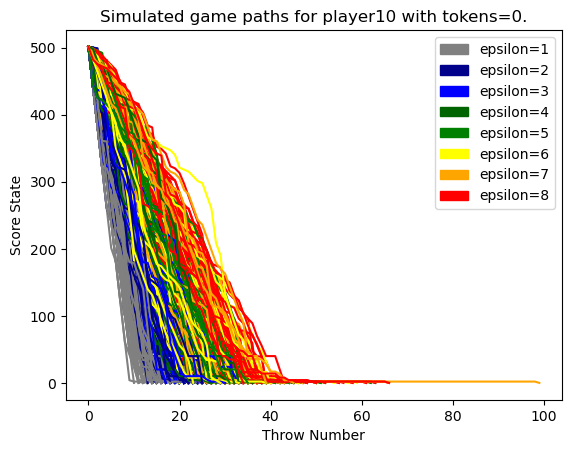

In [139]:
color_map = {1:'grey',2:'darkblue',3:'blue',4:'darkgreen',5:'green',6:'yellow',7:'orange',8:'red'}

for game in range(iterations):
    for epsilon in epsilon_list:
        df_game = df.loc[df.game_id==game].loc[df.epsilon==epsilon].copy()[['throw_number','state_score']].set_index('throw_number')
        color = color_map[epsilon]
        fig = plt.plot(df_game,color=color)

fig = plt.xlabel('Throw Number')
fig = plt.ylabel('Score State')
fig = plt.title(f"Simulated game paths for player{player_num} with tokens={tokens}.")# and epsilon={epsilon}")

patches = []
for c in color_map:
    patch = mpatches.Patch(color=color_map[c], label=f'epsilon={c}')
    patches.append(patch)

fig = plt.legend(handles=patches)

In [146]:
# Initialize Parameters 

iterations = 100
player_num = 10
tokens = 1
epsilon_list = [1,2,3,4,5,6,7,8]
starting_state = (501,tokens)

col_names = ['player','epsilon','tokens','game_id','throw_number','state','state_score','state_tokens']
df = pd.DataFrame(columns=col_names)

for epsilon in epsilon_list:
    
    sim = Simulator(player_num=player_num,epsilon=epsilon)
    simulation_paths = run_simulation(iterations,starting_state)
    df = pd.concat([df,build_dataset(simulation_paths,player_num,epsilon,tokens)])
    df = df.reset_index().drop(['index'],axis=1)
    


load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.044s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.065s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e3_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.067s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e4_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.07

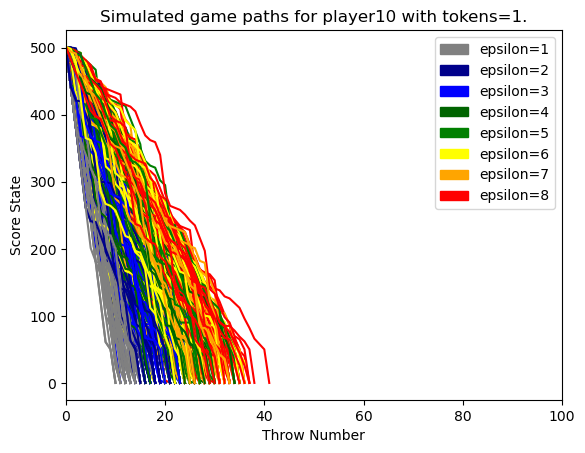

In [147]:
color_map = {1:'grey',2:'darkblue',3:'blue',4:'darkgreen',5:'green',6:'yellow',7:'orange',8:'red'}

for game in range(iterations):
    for epsilon in epsilon_list:
        df_game = df.loc[df.game_id==game].loc[df.epsilon==epsilon].copy()[['throw_number','state_score']].set_index('throw_number')
        color = color_map[epsilon]
        fig = plt.plot(df_game,color=color)

fig = plt.xlabel('Throw Number')
fig = plt.ylabel('Score State')
fig = plt.xlim(0,100)
fig = plt.title(f"Simulated game paths for player{player_num} with tokens={tokens}.")# and epsilon={epsilon}")

patches = []
for c in color_map:
    patch = mpatches.Patch(color=color_map[c], label=f'epsilon={c}')
    patches.append(patch)

fig = plt.legend(handles=patches)

In [148]:
# Initialize Parameters 

iterations = 100
player_num = 10
tokens = 3
epsilon_list = [1,2,3,4,5,6,7,8]
starting_state = (501,tokens)

col_names = ['player','epsilon','tokens','game_id','throw_number','state','state_score','state_tokens']
df = pd.DataFrame(columns=col_names)

for epsilon in epsilon_list:
    
    sim = Simulator(player_num=player_num,epsilon=epsilon)
    simulation_paths = run_simulation(iterations,starting_state)
    df = pd.concat([df,build_dataset(simulation_paths,player_num,epsilon,tokens)])
    df = df.reset_index().drop(['index'],axis=1)
    


load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.049s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.053s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e3_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.056s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e4_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.06

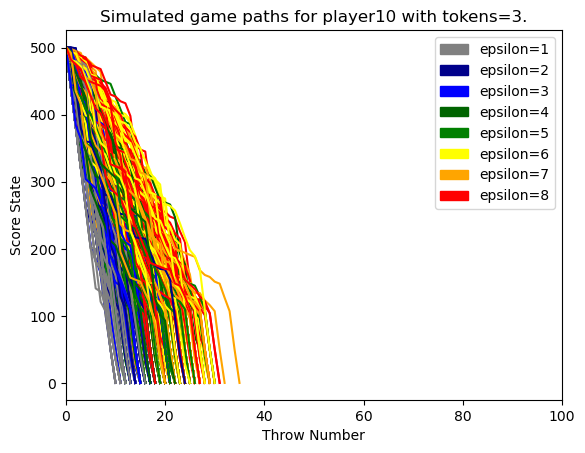

In [149]:
color_map = {1:'grey',2:'darkblue',3:'blue',4:'darkgreen',5:'green',6:'yellow',7:'orange',8:'red'}

for game in range(iterations):
    for epsilon in epsilon_list:
        df_game = df.loc[df.game_id==game].loc[df.epsilon==epsilon].copy()[['throw_number','state_score']].set_index('throw_number')
        color = color_map[epsilon]
        fig = plt.plot(df_game,color=color)

fig = plt.xlabel('Throw Number')
fig = plt.ylabel('Score State')
fig = plt.xlim(0,100)
fig = plt.title(f"Simulated game paths for player{player_num} with tokens={tokens}.")# and epsilon={epsilon}")

patches = []
for c in color_map:
    patch = mpatches.Patch(color=color_map[c], label=f'epsilon={c}')
    patches.append(patch)

fig = plt.legend(handles=patches)

In [156]:
# Initialize Parameters 

iterations = 100
player_num = 10
tokens = 7
epsilon_list = [1,2,3,4,5,6,7,8]
starting_state = (501,tokens)

col_names = ['player','epsilon','tokens','game_id','throw_number','state','state_score','state_tokens']
df = pd.DataFrame(columns=col_names)

for epsilon in epsilon_list:
    
    sim = Simulator(player_num=player_num,epsilon=epsilon)
    simulation_paths = run_simulation(iterations,starting_state)
    df = pd.concat([df,build_dataset(simulation_paths,player_num,epsilon,tokens)])
    df = df.reset_index().drop(['index'],axis=1)
    


load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e1_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.035s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e2_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.034s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e3_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.038s.
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_no_tokens/player10_e4_gaussin_prob_grid_custom_no_tokens.pkl
load_pickle from ./data_parameter/player_gaussin_fit/grid_custom_tokens/t_gaussin_prob_grid_custom_tokens.pkl
Ran in 0.03

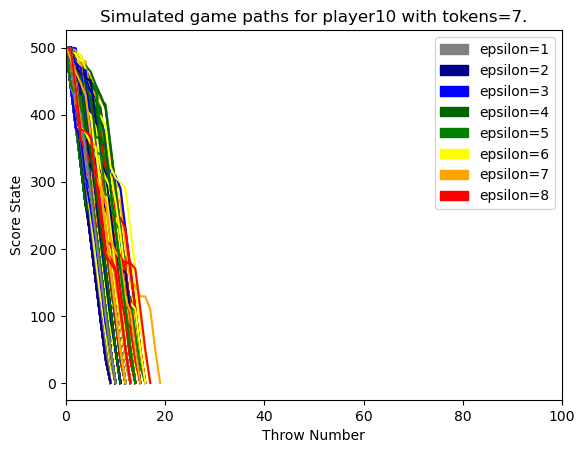

In [157]:
color_map = {1:'grey',2:'darkblue',3:'blue',4:'darkgreen',5:'green',6:'yellow',7:'orange',8:'red'}

for game in range(iterations):
    for epsilon in epsilon_list:
        df_game = df.loc[df.game_id==game].loc[df.epsilon==epsilon].copy()[['throw_number','state_score']].set_index('throw_number')
        color = color_map[epsilon]
        fig = plt.plot(df_game,color=color)

fig = plt.xlabel('Throw Number')
fig = plt.ylabel('Score State')
fig = plt.xlim(0,100)
fig = plt.title(f"Simulated game paths for player{player_num} with tokens={tokens}.")# and epsilon={epsilon}")

patches = []
for c in color_map:
    patch = mpatches.Patch(color=color_map[c], label=f'epsilon={c}')
    patches.append(patch)

fig = plt.legend(handles=patches)